In [2]:
import csv
import gzip
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np

In [3]:
file = "amazon_reviews_us_Gift_Card_v1_00.tsv"
header = ''

In [4]:
dataset = []

In [5]:
# read tsv file
with open(file) as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    count = 0
    for row in reader:
        if count == 0:
            header = row
        else:
            # Convert to key-value pairs
            d = dict(zip(header, row))
            # Convert strings to integers for some fields:
            d['star_rating'] = int(d['star_rating'])
            d['helpful_votes'] = int(d['helpful_votes'])
            d['total_votes'] = int(d['total_votes'])
            dataset.append(d)
        count += 1

In [6]:
# get header
header

['marketplace',
 'customer_id',
 'review_id',
 'product_id',
 'product_parent',
 'product_title',
 'product_category',
 'star_rating',
 'helpful_votes',
 'total_votes',
 'vine',
 'verified_purchase',
 'review_headline',
 'review_body',
 'review_date']

In [7]:
# check dataset
dataset[0]
dataset[0]['star_rating']

5

## Question1

In [8]:
one_star = 0
two_star = 0
three_star = 0
four_star = 0
five_star = 0
six_star = 0
# check if there is any invalid values
other = 0

for d in dataset:
    if d['star_rating'] == 1:
        one_star += 1
    elif d['star_rating'] == 2:
        two_star +=1
    elif d['star_rating'] == 3:
        three_star +=1
    elif d['star_rating'] == 4:
        four_star +=1
    elif d['star_rating'] == 5:
        five_star +=1
    elif d['star_rating'] == 6:
        six_star += 1
    else:
        print(d['star_rating'])
        other += 1

In [9]:
# Ratings
print("one_star value is", one_star)
print("two_star value is", two_star)
print("three_star value is", three_star)
print("four_star value is", four_star)
print("five_star value is", five_star)

one_star value is 4766
two_star value is 1560
three_star value is 3147
four_star value is 9808
five_star value is 129029


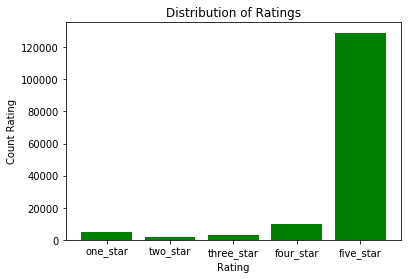

In [10]:
# draw plots
x = [u'one_star', u'two_star', u'three_star', u'four_star', u'five_star']
y = [one_star, two_star, three_star, four_star, five_star]
plt.bar(np.arange(5), y, color='green')
plt.xlabel("Rating")
plt.ylabel("Count Rating")
plt.title("Distribution of Ratings")
plt.xticks(np.arange(5), x)
plt.show()

## Question2

In [11]:
one_star_v = 0
two_star_v = 0
three_star_v = 0
four_star_v = 0
five_star_v = 0

one_star_nv = 0
two_star_nv = 0
three_star_nv = 0
four_star_nv = 0
five_star_nv = 0

In [12]:
for d in dataset:
    if d['verified_purchase'] == 'Y':
        if d['star_rating'] == 1:
            one_star_v += 1
        elif d['star_rating'] == 2:
            two_star_v +=1
        elif d['star_rating'] == 3:
            three_star_v +=1
        elif d['star_rating'] == 4:
            four_star_v +=1
        elif d['star_rating'] == 5:
            five_star_v +=1
        elif d['star_rating'] == 6:
            six_star_v += 1
    else:
        if d['star_rating'] == 1:
            one_star_nv += 1
        elif d['star_rating'] == 2:
            two_star_nv +=1
        elif d['star_rating'] == 3:
            three_star_nv +=1
        elif d['star_rating'] == 4:
            four_star_nv +=1
        elif d['star_rating'] == 5:
            five_star_nv +=1
        elif d['star_rating'] == 6:
            six_star_nv += 1

In [13]:
# Ratings for verified
print("---Verified---")
print("one_star varified value is", one_star_v)
print("two_star varified value is", two_star_v)
print("three_star varified value is", three_star_v)
print("four_star varified value is", four_star_v)
print("five_star varified value is", five_star_v)
print("---Unverified---")
# Ratings for unvarified
print("one_star unverified value is", one_star_nv)
print("two_star unverified value is", two_star_nv)
print("three_star unverified value is", three_star_nv)
print("four_star unverified value is", four_star_nv)
print("five_star unverified value is", five_star_nv)

---Verified---
one_star varified value is 3977
two_star varified value is 1335
three_star varified value is 2775
four_star varified value is 8890
five_star varified value is 118312
---Unverified---
one_star unverified value is 789
two_star unverified value is 225
three_star unverified value is 372
four_star unverified value is 918
five_star unverified value is 10717


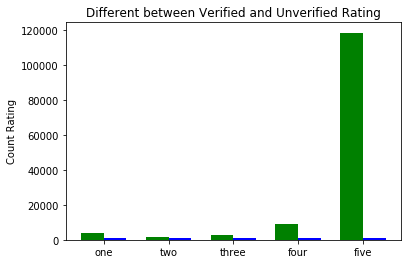

In [15]:
# plot to show difference
verified = (one_star_v, two_star_v, three_star_v, four_star_v, five_star_v)
unverified = (one_star_nv, one_star_nv, one_star_nv, one_star_nv, one_star_nv)

wid = 0.35       
plt.bar(np.arange(5), verified, wid, label='verified', color = 'green')
plt.bar(np.arange(5) + wid, unverified, wid, label='unverified', color = 'blue')

plt.ylabel('Count Rating')
plt.title('Different between Verified and Unverified Rating')

plt.xticks(np.arange(5) + wid / 2, ('one', 'two', 'three', 'four', 'five'))
plt.show()

## Question3

In [16]:
# change char to binary
def change_rating_binary(d):
    if d['verified_purchase'] == 'Y':
        return 1
    else:
        return 0

In [17]:
# change review length to integer
def change_length(d):
    return len(d['review_body'])

In [18]:
def feature(datum):
    return 1

In [21]:
#change them and feature them together
X = [[feature(d), change_rating_binary(d), change_length(d)] for d in dataset]
y = [d['star_rating'] for d in dataset]
theta,residuals,rank,s = np.linalg.lstsq(X, y, rcond = -1)

In [22]:
print('theta: ', theta)
print('residuals: ', residuals)
print('rank: ', rank)
print('s: ',s)

theta:  [ 4.84503504e+00  4.98580589e-02 -1.24545526e-03]
residuals:  [96527.7126718]
rank:  3
s:  [7.63737053e+04 4.13969743e+02 7.62987958e+01]


**Explaination:**
1. theta0: It represents the intercept with y-axis in the equation. It means when the review length is 0 and the reivew is not verified; then the rating is about 4.845.


2. theta1: It is positive, so it relfects a positive relationship with rating and verified. If give one more verified review, then the rating will improved by 4.9858e-02 by this review.


3. theta2: It is negative, so it relfects a negative relationship with rating and comment length. If give one more review with more characters, then the rating will decreased by 1.245e-03 by this review.

## Question4##

In [25]:
X_new = [[feature(d), change_rating_binary(d)] for d in dataset]
y = [d['star_rating'] for d in dataset]
theta_new,residuals_new,rank_new,s_new = np.linalg.lstsq(X_new, y, rcond = -1)

In [26]:
print('theta_new: ', theta_new)
print('residuals_new: ', residuals_new)
print('rank_new: ', rank_new)
print('s_new: ',s_new)

theta_new:  [4.578143   0.16793392]
residuals_new:  [101651.71982147]
rank_new:  2
s_new:  [526.54065513  79.71159574]


**Explaination:**

Since from the question3, we can see the word length has negative effect to the rating result. As a result, if we drop the "negative effected" coefficient, then the weight of effects bteween "review is verified" and "rating" will increase a lot. That will increase the coefficient of the feature.

## Question5##

In [27]:
train_pct_index = int(0.9 * len(dataset))
X_train, X_test = X_new[:train_pct_index], X_new[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

In [28]:
theta_train,residuals_train,rank_train,s_train = np.linalg.lstsq(X_train, y_train, rcond = -1)

In [29]:
theta_train

array([4.43966713, 0.31636878])

In [31]:
# set up the equation to find trained y
rating_train = theta_train[0] + [theta_train[1]*d[1] for d in X_train]
# calculate mse for training
mse_train = sum((y_train-rating_train)**2)/len(rating_train)
print("testing set MSE: ",mse_train)

testing set MSE:  0.6554842196700205


In [32]:
# calculate MSE for testing set
rating_test = theta_train[0] + [theta_train[1]*d[1] for d in X_test]
mse_testing = sum((y_test-rating_test)**2)/len(rating_test)
print("testing set MSE: ",mse_testing)

testing set MSE:  0.9723851990302826


## Question6##

In [33]:
print("testing set MAE: ", mean_absolute_error(y_test,rating_test))
print("testing set R^2: ", r2_score(y_test,rating_test))

testing set MAE:  0.6221007247297486
testing set R^2:  -0.04811587359357783


## Question8##

In [40]:
# get new features
new_featureX = [[feature(d), d['star_rating'], change_length(d)] for d in dataset]
new_featureY = [change_rating_binary(d) for d in dataset]
X_train2, X_test2 = new_featureX[:train_pct_index], new_featureX[train_pct_index:]
y_train2, y_test2 = new_featureY[:train_pct_index], new_featureY[train_pct_index:]

In [45]:
mod = linear_model.LogisticRegression(C=1.0)
mod.fit(X_train2, y_train2)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
# get predictions
train2_predictions = mod.predict(X_train2)
test2_predictions = mod.predict(X_test2)

In [55]:
correct_train = train2_predictions == y_train2
correct_pred = test2_predictions == y_test2

In [67]:
# train accuracy
print("train accuracy is: ", sum(correct_train) / len(correct_train))
print("test accuracy is: ", sum(correct_pred) / len(correct_pred))

train accuracy is:  0.9511683485791772
test accuracy is:  0.5597734475085968


In [79]:
# positive labels
print("The propotion of positive labels is: ", np.mean(y_test2))
print("THe propotion of positive predictions is: ", np.mean(test2_predictions))

The propotion of positive labels is:  0.5595711684984155
THe propotion of positive predictions is:  0.9989886049490931


## Question9##

In [260]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing as pp
from sklearn import preprocessing

In [265]:
copied = pd.DataFrame(dataset)

In [266]:
#proprocess data
copied['review_len'] = copied['review_body'].fillna('').apply(lambda x: len(x))
copied['verified_purchase'] = copied['verified_purchase'].apply(lambda x: 1 if x == 'Y' else 0)
copied['review_date'] = pd.to_datetime(copied['review_date']).dt.year.fillna(0)
copied_sub = copied.drop(['verified_purchase'],axis = 1)

In [268]:
# log-scales review
num_feat = ['review_len']
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# one-hot encodes time
group_time_feat = ['review_date']
group_time_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(categories = 'auto',sparse = False))
])

# preprocessing pipeline (put them together)
preproc = ColumnTransformer(transformers=[
                            ('Fae', num_transformer, num_feat),
                            ('cat', group_time_transformer, group_time_feat)],
                            remainder='passthrough')

X_train3,X_test3 = copied[['review_len','review_date']][:train_pct_index], copied[['review_len','review_date']][train_pct_index:]
y_train3, y_test3 = copied['verified_purchase'][:train_pct_index], copied['verified_purchase'][train_pct_index:]

pl = Pipeline(steps=[('preprocessor', preproc), ('regressor', LogisticRegression())])
pl.fit(X_train3,y_train3)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('Fae', Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))]), ['review_len']), ('cat', P...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [272]:
print("Train Accuray: ",model.score(X_train, y_train))
print("Test Accuray: ", model.score(X_test, y_test))

Train Accuray:  0.9532360895721425
Test Accuray:  0.5975996224125143


The first feature I designed is the log-scales of review length, and I would like to see whether the logrisim of length will improve the accuracy score. The second feature is the onehotencode of the reivew year. I extract the year of "review_date" and using onehotencode to binarize them in order to see further relation.